# Chapter 3 Estimators

## Part A

### Example 3.2

Simulation of the sampling distribution of the estimators $X_{(n)}(n+2)/(n+1)$ and $2 \bar X$. We take $1000$ independent sample of size $n = 50$ from $U(0,1)$.

The true $\theta$ is 1.


In [36]:
rng(1000)
B = 1000;  n = 50;
T1 = zeros(1, B);
T2 = T1;

for i = 1:B
    u = rand(50,1);
    T2(i) = 2 * mean(u);
    T1(i) = max(u) * (n+2)/(n+1);
end

In [37]:
mean(T2)
var(T2)
1/150

ans =
    0.9993
ans =
    0.0066
ans =
    0.0067


Current plot held
Current plot released


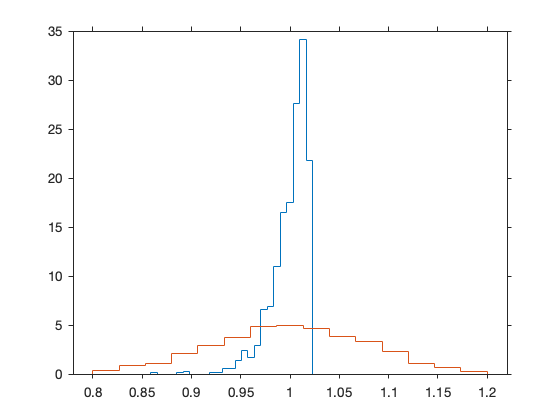

In [38]:
histogram(T1, 'Normalization', 'pdf', 'BinLimits', [0.8, 1.2], 'DisplayStyle', 'stairs')
hold
histogram(T2, 'Normalization', 'pdf', 'BinLimits', [0.8, 1.2], 'DisplayStyle', 'stairs')
hold

Compute and plot the difference $|T_1 -1| - |T_2 - 1|$ 

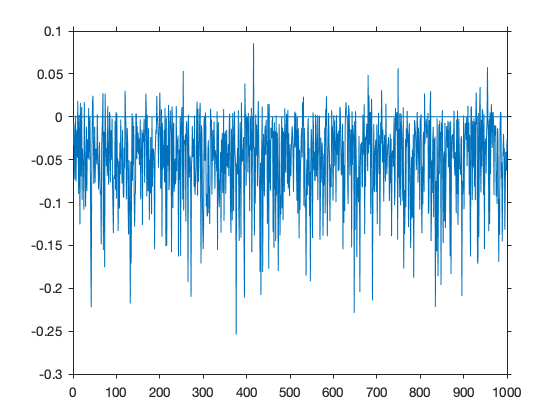

In [39]:
plot(abs(T1 - 1) - abs(T2 -1))
refline(0)

### Estimate of the mean of normal density and standard error

In [40]:
mu = 20 * rand(1);
n = 100;
x = mu + 5 * randn(n,1);

In [41]:
mean(x)

ans =
    9.9861


In [42]:
se = 5/sqrt(n)

se =
    0.5000


In [43]:
mu

mu =
    9.0865


### Example 3.6
 Comparison of estimators for the upper limit of a uniform distribution.

Current plot held
Current plot released


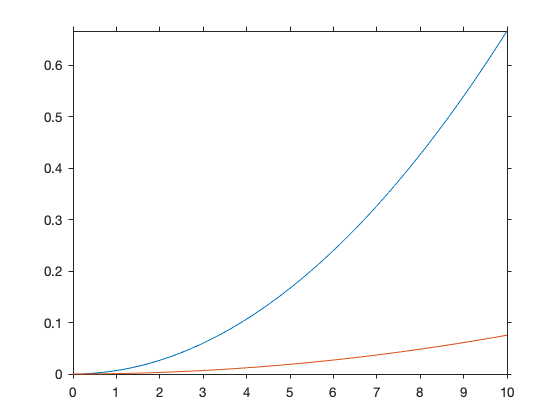

In [44]:
n =50;
fplot(@(x) x.^2./(3*n), [0,10])
hold
fplot(@(x) 2 * x.^2./((n+2)*(n+1)), [0,10])
hold

The second estimator (in orange) is uniformly better of the first.

Below a comparison with the MSE of the estimator $X_{(n)} (n+2)/(n+1)$.

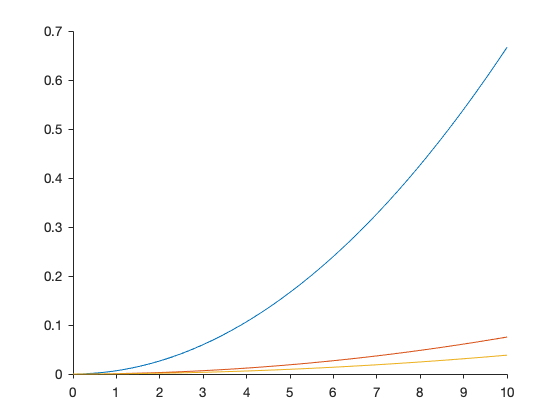

In [45]:
n =50;
hold on 
fplot(@(x) x.^2./(3*n), [0,10])
fplot(@(x) 2 * x.^2./((n+2)*(n+1)), [0,10])
fplot(@(x) x.^2./((n+1)^2), [0,10])
hold off

## Part B 

### Example 3.9 Binomial

Three successes in 10 trials. Number of combinations removed.

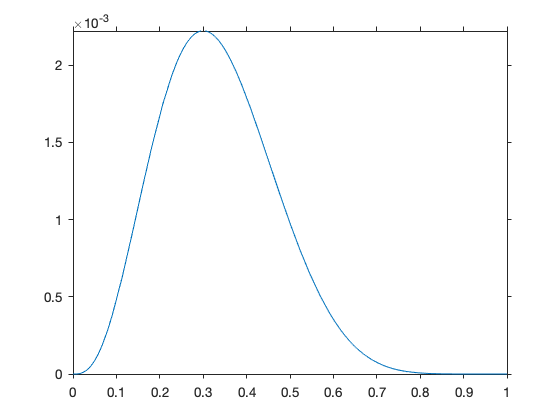

In [46]:
fplot(@(p) p.^(3) .* (1-p).^7, [0,1])

The log-likelihood appears different.

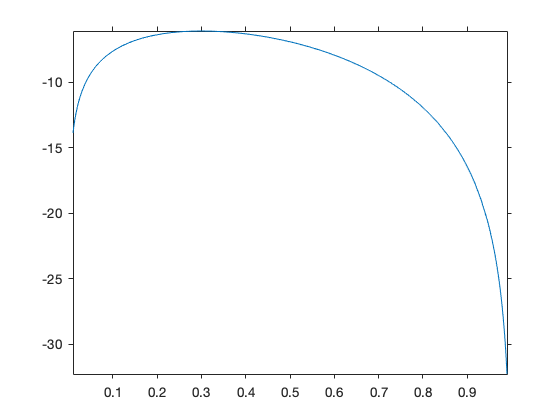

In [47]:
fplot(@(p)log( p.^(3) .* (1-p).^7), [0.01,.99])

### Example 3.12 Exponential
Data for time until failure of a sample of electronic components (Kalbfleish). 

In [48]:
x = [70,11,66,5,20,4,35,40,29,8];  % data set
n = length(x)
ml = 1/mean(x)

n =
    10
ml =
    0.0347


Current plot held


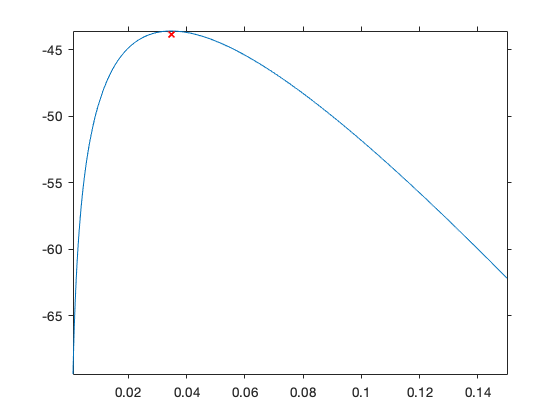

In [49]:
likexp = @(lam) n * log(lam) - lam .* sum(x);
fplot(likexp, [0.001, 0.15])
hold
plot(1/mean(x), -43.9, 'xr')   

### Example 3.13 Not differentiable likelihood

Binomial counts 10 successes in 10 trials.

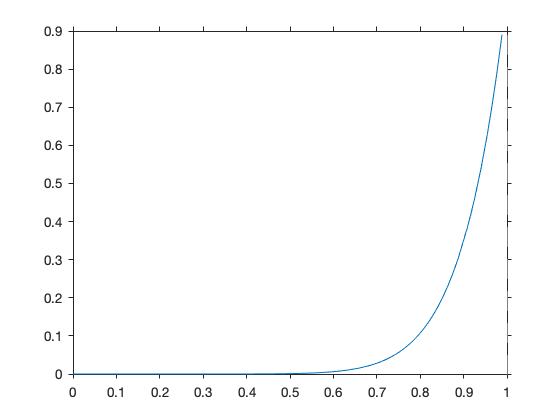

In [50]:
fplot(@(p) p.^10, [0,1])

### Example 3.14
Normal likelihood for the height in a sample of males.  

In [51]:
male = [175.0000
  199.0000
  186.0000
  176.0000
  193.0000
  188.0000
  184.0000
  189.0000
  185.0000
  177.0000
  186.0000
  190.0000
  182.0000
  187.0000
  184.0000
  183.0000
  172.0000
  179.0000
  191.0000
  189.0000
  183.0000
  186.0000
  174.0000
  191.0000
  179.0000
  175.0000
  174.0000
  185.0000
  183.0000
  185.0000
  189.0000
  197.0000
  198.0000
  180.0000
  196.0000
  170.0000
  187.0000
  180.0000
  171.0000
  189.0000
  179.0000
  180.0000
  180.5000
  169.0000];
  n = length(male)

n =
    44


Current plot held
Current plot released


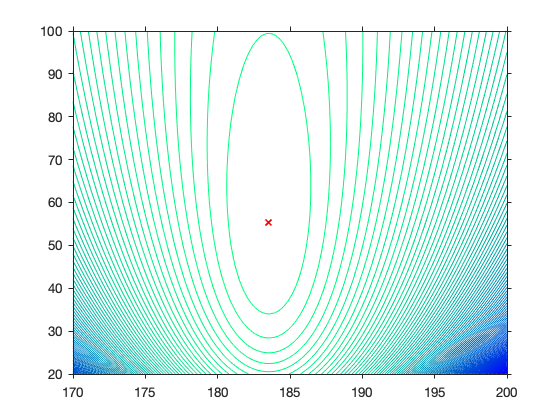

In [52]:
liknor = @(mu, s2) - (n/2) .* log(s2) - sum((male - mu).^2) ./ (2 * s2);

z = zeros(100);
mu = linspace(170, 200, 100);
s2 = linspace(20, 100, 100);

for i = 1:100
    for j = 1:100
        z(i,j) = liknor(mu(j), s2(i));
    end
end
colormap(winter)
contour(mu,s2,z, 100)
hold
plot(mean(male), (43/44)* var(male), 'xr' )
hold

### Example 3.15 Uniform distribution

A random sample of size $20$ from $[0, 100]$.  

In [53]:
x = 100 .* rand(20, 1)';

In [54]:
ml = max(x)

ml =
   98.6427


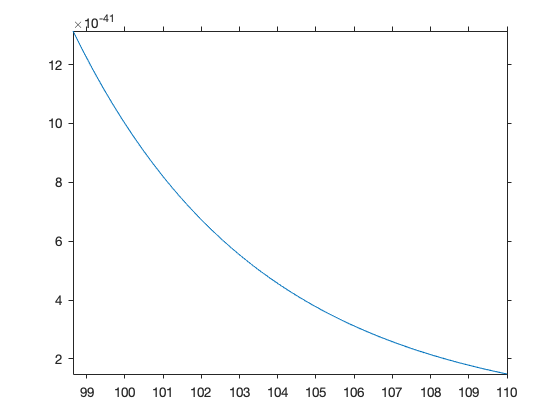

In [55]:
fplot(@(t) 1 ./ t.^20, [max(x), 110] )

### Example 3.18 Gamma distribution
Data on the duration of service (in minutes) for 15 bank customers. 


In [56]:
x = [23.91 27.33 0.16 3.66 6.99 0.88 0.93 0.63 0.17 14.17 6.18 0.06 3.89 0.24 0.08];
n = length(x)

n =
    15


In [57]:
help psi

 PSI  Psi (polygamma) function.
    Y = PSI(X) evaluates the psi function for each element of X.
    X must be real and nonnegative.  SIZE(Y) is the same as SIZE(X).
    The psi function, also know as the digamma function, is the logarithmic
    derivative of the gamma function: 
 
       psi(x) = digamma(x) = d(log(gamma(x)))/dx = (d(gamma(x))/dx)/gamma(x).
 
    Y = PSI(K,X) evaluates the K-derivative of psi at the elements of X.
    For real integer-valued scalar K, SIZE(Y) is the same as SIZE(X).
    PSI(0,X) is the digamma function, PSI(1,X) is the trigamma function,
    PSI(2,X) is the tetragamma function, etc.
 
    Examples:
 
       -psi(1) = -psi(0,1) is Euler's constant, 0.5772156649015323.
 
       psi(1,2) = pi^2/6 - 1.
 
       x = (1:.005:1.250)';  [x gamma(x) gammaln(x) psi(0,x) psi(1,x) x-1]
       produces the first page of table 6.1 of Abramowitz and Stegun.
 
       x = (1:.01:2)'; [psi(2,x) psi(3,x)] is a portion of table 6.2.
 
    See also GAMMA, GAMMALN, GAMMAIN

In [58]:
fun = @(a) sum(log(x)) + n * log(a) - n * log(mean(x)) - n*psi(a);

ml_a = fzero(fun, 0.5)  % 0.5 is the starting point
ml_lam = ml_a/mean(x)

ml_a =
    0.4376
ml_lam =
    0.0735


Current plot held
Current plot released


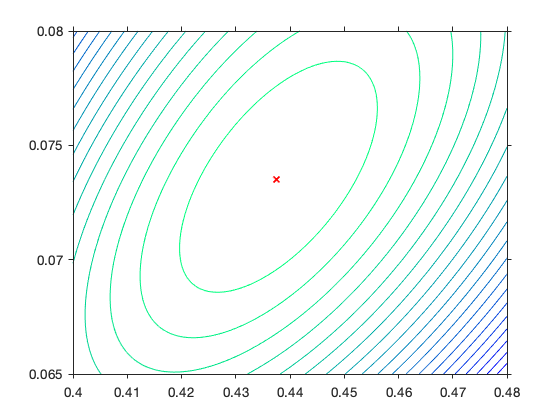

In [59]:
likgamma = @(a, lam)  (a - 1) * sum(log(x)) + n * a * log(lam) - lam * sum(x) - n * gammaln(a);

z = zeros(100);
a = linspace(0.4, 0.48, 100);
lam = linspace(0.065, 0.08, 100);

for i = 1:100
    for j = 1:100
        z(i,j) = likgamma(a(j), lam(i));
    end
end

colormap(winter)
contour(a,lam,z, 20)
hold
plot(ml_a, ml_lam, 'xr')
hold

## Part C Bayesian estimators 
### The Beta density


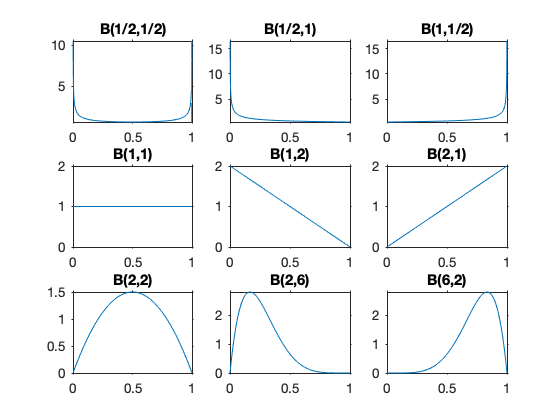

In [60]:
subplot(3,3,1)
fplot(@(p) betapdf(p, 0.5,0.5) , [0,1])
title('B(1/2,1/2)')
subplot(3,3,2)
fplot(@(p) betapdf(p, 0.5,1) , [0,1])
title('B(1/2,1)')
subplot(3,3,3)
fplot(@(p) betapdf(p, 1,0.5) , [0,1])
title('B(1,1/2)')
subplot(3,3,4)
fplot(@(p) betapdf(p, 1,1) , [0,1])
title('B(1,1)')
subplot(3,3,5)
fplot(@(p) betapdf(p, 1,2) , [0,1])
title('B(1,2)')
subplot(3,3,6)
fplot(@(p) betapdf(p, 2,1) , [0,1])
title('B(2,1)')
subplot(3,3,7)
fplot(@(p) betapdf(p, 2,2) , [0,1])
title('B(2,2)')
subplot(3,3,8)
fplot(@(p) betapdf(p, 2,6) , [0,1])
title('B(2,6)')
subplot(3,3,9)
fplot(@(p) betapdf(p, 6,2) , [0,1])
title('B(6,2)')


### Fig. 3.7
The prior is $Beta(25,5)$. On top 3 samples from $Bin(n=25, p = 1/2)$. On bottom 
3 samples from $Bin(n = 100, p = 1/2)$.

The prior is quite concentrated on $p = 25/30$.

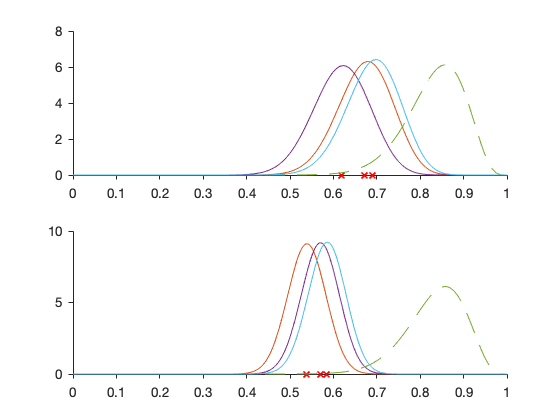

In [61]:
rng(101)
n = 25;
alpha = 25;
beta = 5;
p = 1/2;
subplot(2,1,1)
hold on
for i = 1:3
    fplot(@(p) betapdf(p, 25,5), [0,1], '--')
    x = binornd(n,p);
    fplot(@(p) betapdf(p,alpha + x, beta + n - x), [0,1])
    plot((alpha + x)/(alpha + beta + n),0, 'xr') 
end
hold off

n = 100;
alpha = 25;
beta = 5;
p = 1/2;
subplot(2,1,2)
hold on
for i = 1:3
    fplot(@(p) betapdf(p, 25,5), [0,1], '--')
    x = binornd(n,p);
    fplot(@(p) betapdf(p,alpha + x, beta + n - x), [0,1])
    plot((alpha + x)/(alpha + beta + n),0, 'xr') 
end
hold off


### Figure 3.8
Mean square error of the Bayes estimators with $n = 20$.


In [66]:
mse = @(x, a, b) (x.^2 .* ((a + b).^2 - n) + x .* (n - 2 * a .* (a + b)) + a.^2) ./ (n + a + b).^2;

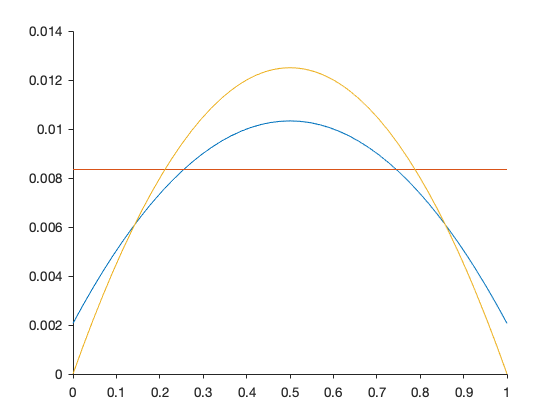

In [67]:
hold on
n = 20;
a = 1; b = 1; 
fplot(@(x) mse(x,a,b), [0,1])
a = (1/2)*sqrt(n); b = (1/2)*sqrt(n);
fplot(@(x) mse(x,a,b), [0,1])
a = 0; b = 0;   
fplot(@(x) mse(x,a,b), [0,1])
hold off